In [60]:
import numpy as np
from scipy import ndimage, stats, ndimage
import matplotlib.pyplot as plt
from nilearn import plotting, image, input_data
from nilearn.image import load_img, index_img, new_img_like, resample_to_img, threshold_img
from nilearn.input_data import NiftiMasker
from scipy.stats import norm
import timeit
import seaborn as sns
import pandas as pd
from lmfit.models import SkewedGaussianModel
from nipype.interfaces.fsl.model import SmoothEstimate

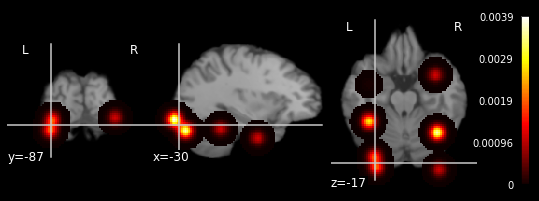

In [75]:
# get example foci image (BMID: 14110242-1)
foci_image = image.load_img('14110242_1_foci_tal.nii')
sm_foci_image = image.smooth_img(foci_image, fwhm=12) #fhwm is in mm, 12
sm_foci_image = image.index_img(sm_foci_image,0) #get rid of temporal dimension
bg_image = image.load_img('../colin_27.nii.gz')
plotting.plot_stat_map(sm_foci_image, bg_image)

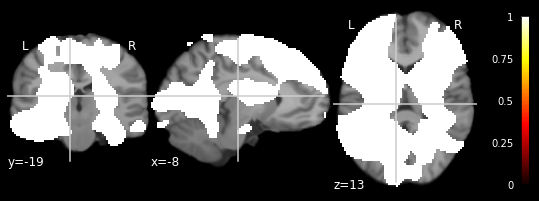

In [76]:
# get component image and positive mask
ic_func_3 = image.load_img('../FUNCTIONAL_ICA_BRAINMAP_03.nii.gz')
ic_func_3_pos_mask = image.math_img('img > 0',img=ic_func_3)

plotting.plot_stat_map(ic_func_3_ps, bg_image)

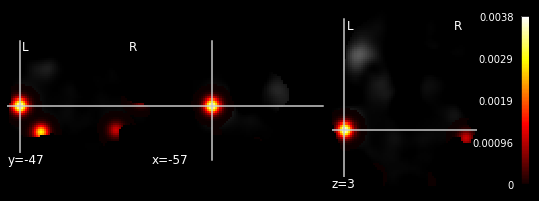

In [77]:
masker = input_data.NiftiMasker(mask_img=ic_func_3_pos_mask)

# get array data (within mask) of smoothed foci data and component image
foci_data = masker.fit_transform(sm_foci_image)
ic_data = masker.fit_transform(ic_func_3)

# plot masked foci data over masked component data
foci_data_from_mask = masker.inverse_transform(foci_data)
ic_data_from_mask = masker.inverse_transform(ic_data)
#plotting.plot_stat_map(ic_data_from_mask, bg_image)
plotting.plot_stat_map(foci_data_from_mask,ic_data_from_mask)

In [78]:
np.corrcoef(foci_data,ic_data)[0,1]

0.015195890703741145

from func549-norm-filtered-cc-gt0 w/ IC-3: 
14110242_1 = 0.0438 - this script result: 0.0151
16030053_5 = 0.4083 - this script result: 0.3999
7010010_1 = 0.3855 - this script result: 0.3937